In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("blotter.csv")
df.head()

C:\Users\David\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,HIERARCHYDESC,OFFENSES,INCIDENTTRACT,X,Y
0,2075487,5000381,6,1/1/2005 8:00,"5400 Block NORTHUMBERLAND ST PITTSBURGH, PA",N,Squirrel Hill North,4,MOTOR THEFT (OTHER)-PLATE ONLY,3921 Theft by Unlawful Taking or Disposition.,1401.0,-79.934027,40.438870
1,2075783,5001279,7,1/3/2005 2:00,"PARKVIEW PITTSBURGH, PA",N,Squirrel Hill North,4,MTR VEH THEFT (AUTO),3921 Theft by Unlawful Taking or Disposition.,407.0,0.000000,0.000000
2,2075786,5001488,7,1/3/2005 17:00,"CROSBY AND PAULINE & PITTSBURGH, PA",N,Squirrel Hill North,3,MOTOR VEH THEFT/TRUCK-BUS,3921 Theft by Unlawful Taking or Disposition.,1907.0,0.000000,0.000000
3,2076278,5002628,7,1/5/2005 19:30,"1100 Block COLFAX ST PITTSBURGH, PA",N,Squirrel Hill North,1,MTR VEH THEFT (AUTO),3921 Theft by Unlawful Taking or Disposition.,2102.0,-80.024329,40.462542
4,2076279,5002647,7,1/5/2005 20:20,"ALDER/SHADY & PITTSBURGH, PA",N,Shadyside,4,MTR VEH THEFT (AUTO),3921 Theft by Unlawful Taking or Disposition.,705.0,0.000000,0.000000


In [3]:
df.isna().sum()

PK                           0
CCR                          0
HIERARCHY                    0
INCIDENTTIME                 0
INCIDENTLOCATION             0
CLEAREDFLAG                  0
INCIDENTNEIGHBORHOOD      8330
INCIDENTZONE                 5
HIERARCHYDESC           109346
OFFENSES                     0
INCIDENTTRACT             8330
X                         8391
Y                         8391
dtype: int64

In [4]:
df_incident = df.INCIDENTNEIGHBORHOOD.value_counts(dropna=True).rename_axis('Neighborhood').to_frame("counts")
print(df_incident)

                             counts
Neighborhood                       
Golden Triangle/Civic Arena   29147
South Side Flats              28251
Carrick                       18059
Bloomfield                    16223
Shadyside                     14584
...                             ...
New Homestead                   459
Chartiers City                  427
Mt. Oliver Boro                 239
Outside State                   202
Outside County                  201

[94 rows x 1 columns]


In [5]:
df.columns

Index(['PK', 'CCR', 'HIERARCHY', 'INCIDENTTIME', 'INCIDENTLOCATION',
       'CLEAREDFLAG', 'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE', 'HIERARCHYDESC',
       'OFFENSES', 'INCIDENTTRACT', 'X', 'Y'],
      dtype='object')

In [6]:
df.OFFENSES.value_counts()

3304 Criminal Mischief.                                                                                                                                                                                                                                                                                      46555
3921 Theft by Unlawful Taking or Disposition.                                                                                                                                                                                                                                                                42947
3502 Burglary.                                                                                                                                                                                                                                                                                               26846
3745 Accidents Involving Damage to Unattended Veh.or Prop.                     

In [8]:
offense_data =  {
    'Offense':["Criminal Mischief","Theft by Disposition","Burglary","Accidents unattended veh."," Miscellaneous Report"],
    'Count':[46555,42947,26846,23893,23748]
}
df_offense = pd.DataFrame(data = offense_data)
df_offense.head()

,Offense,Count
0,Criminal Mischief,46555
1,Theft by Disposition,42947
2,Burglary,26846
3,Accidents unattended veh.,23893
4,Miscellaneous Report,23748


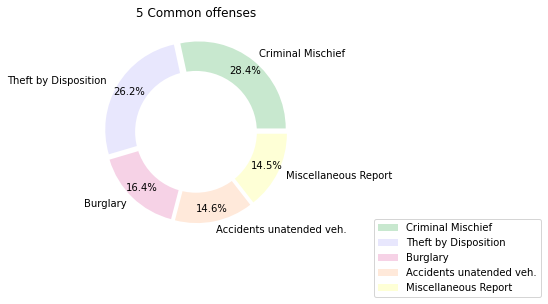

In [8]:
import matplotlib.pyplot as plt
 
 
# setting size in Chart based on
# given values
sizes = [46555, 42947, 26846, 23893, 23748]
 
# Setting labels for items in Chart
labels = ['Criminal Mischief', 'Theft by Disposition ', 'Burglary', 'Accidents unatended veh.', 'Miscellaneous Report']
 
# colors
colors = ['#C8E8CF', '#E8E7FD', '#F6D2E6', '#FFE9DA', '#FEFFD6']
 
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
 
# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
#Title of chart
plt.title('5 Common offenses')
 
# Add Legends
plt.legend(bbox_to_anchor=(1.32,0.1), loc="upper left", borderaxespad=0)
 
# show chart
plt.show()

In [9]:
df.INCIDENTNEIGHBORHOOD.value_counts()

Golden Triangle/Civic Arena    29147
South Side Flats               28251
Carrick                        18059
Bloomfield                     16223
Shadyside                      14584
                               ...  
New Homestead                    459
Chartiers City                   427
Mt. Oliver Boro                  239
Outside State                    202
Outside County                   201
Name: INCIDENTNEIGHBORHOOD, Length: 94, dtype: int64

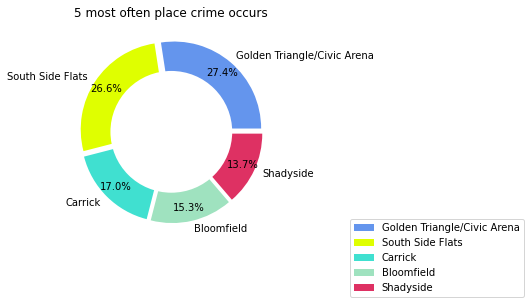

In [11]:
import matplotlib.pyplot as plt
 
 
# setting size in Chart based on
# given values
sizes = [29147, 28251, 18059, 16223, 14584]
 
# Setting labels for items in Chart
labels = ['Golden Triangle/Civic Arena', 'South Side Flats', 'Carrick', 'Bloomfield', 'Shadyside']
 
# colors
colors = ['#6495ED', '#DFFF00', '#40E0D0', '#9FE2BF', '#DE3163']
 
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
 
# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
#Title of chart
plt.title('5 most often place crime occurs')
 
# Add Legends
plt.legend(bbox_to_anchor=(1.32,0.1), loc="upper left", borderaxespad=0)
 
# show chart
plt.show()

In [13]:
df.INCIDENTTIME

0           1/1/2005 8:00
1           1/3/2005 2:00
2          1/3/2005 17:00
3          1/5/2005 19:30
4          1/5/2005 20:20
               ...       
495246    9/20/2015 18:33
495247     9/27/2015 8:30
495248     9/1/2015 11:55
495249      9/4/2015 6:45
495250     9/10/2015 1:39
Name: INCIDENTTIME, Length: 495251, dtype: object

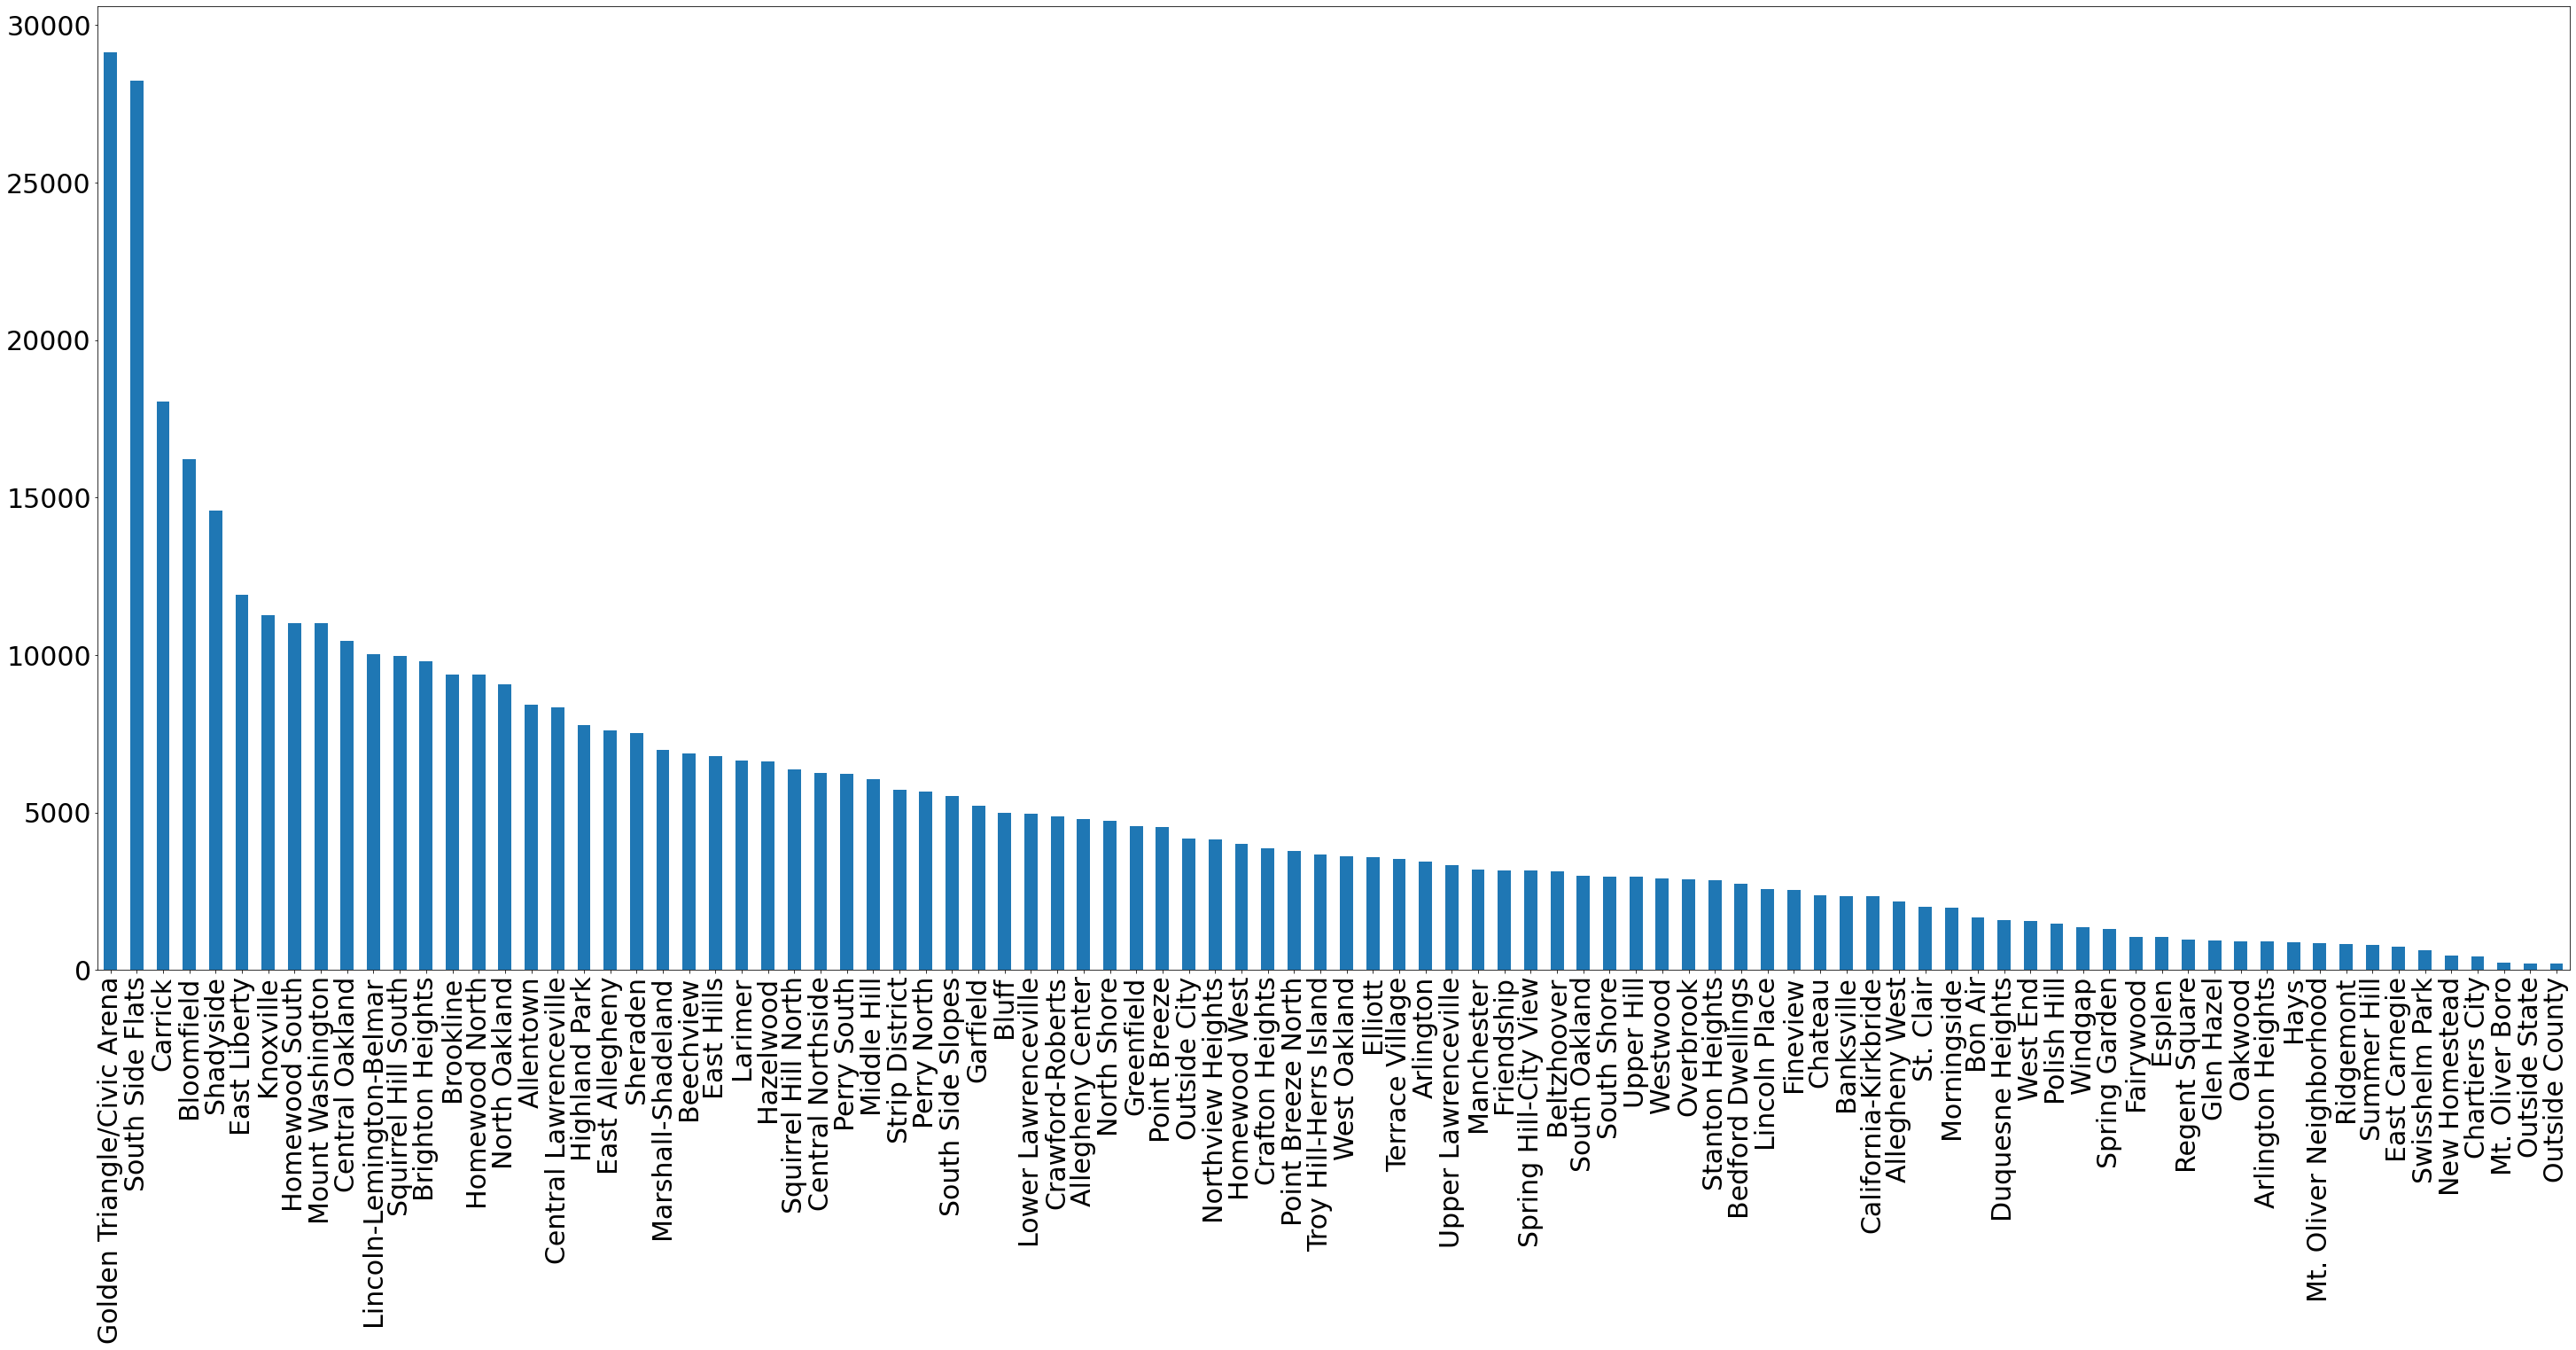

In [14]:
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(50,20))
df['INCIDENTNEIGHBORHOOD'].value_counts().plot(kind = 'bar')